# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Elfikry
- Email: melfikry@gmail.com
- Id Dicoding: muhammadelfikry

## Persiapan

### Menyiapkan library yang dibutuhkan

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Menyiapkan data yang akan diguankan

## Data Understanding

Mengambil dataset dari repository Github

In [192]:
data = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv", delimiter=";")
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


menampilkan informasi ringkas DataFrame

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Memeriksa bentuk, jumlah kolom, dan nama kolom dari dataframe

In [194]:
print("Data shape: ", data.shape)
print("Total columns: ", len(data.columns))
print("Data columns: ", data.columns)

Data shape:  (4424, 37)
Total columns:  37
Data columns:  Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_

Pemeriksaan Missing Values dan Data Duplikat

In [195]:
print("Total missing values: ", data.isnull().sum().sum())
print("Total duplicate rows: ", data.duplicated().sum())

Total missing values:  0
Total duplicate rows:  0


Analisis statistik fitur numerik

In [196]:
data.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Memisahkan fitur numerik dan kategori untuk proses analisis

In [197]:
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = data.select_dtypes(include=["object"]).columns 

print("Total numeric columns: ", len(numeric_columns))
print("Numeric columns: ", numeric_columns)
print("Total categorical columns: ", len(categorical_columns))
print("Categorical columns: ", categorical_columns)

Total numeric columns:  36
Numeric columns:  Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem

Visualisasi sebaran nilai pada fitur numerik. Distribusi fitur numerik menunjukkan adanya ketimpangan di beberapa variabel yang dapat memengaruhi hasil model jika tidak ditangani dengan baik.

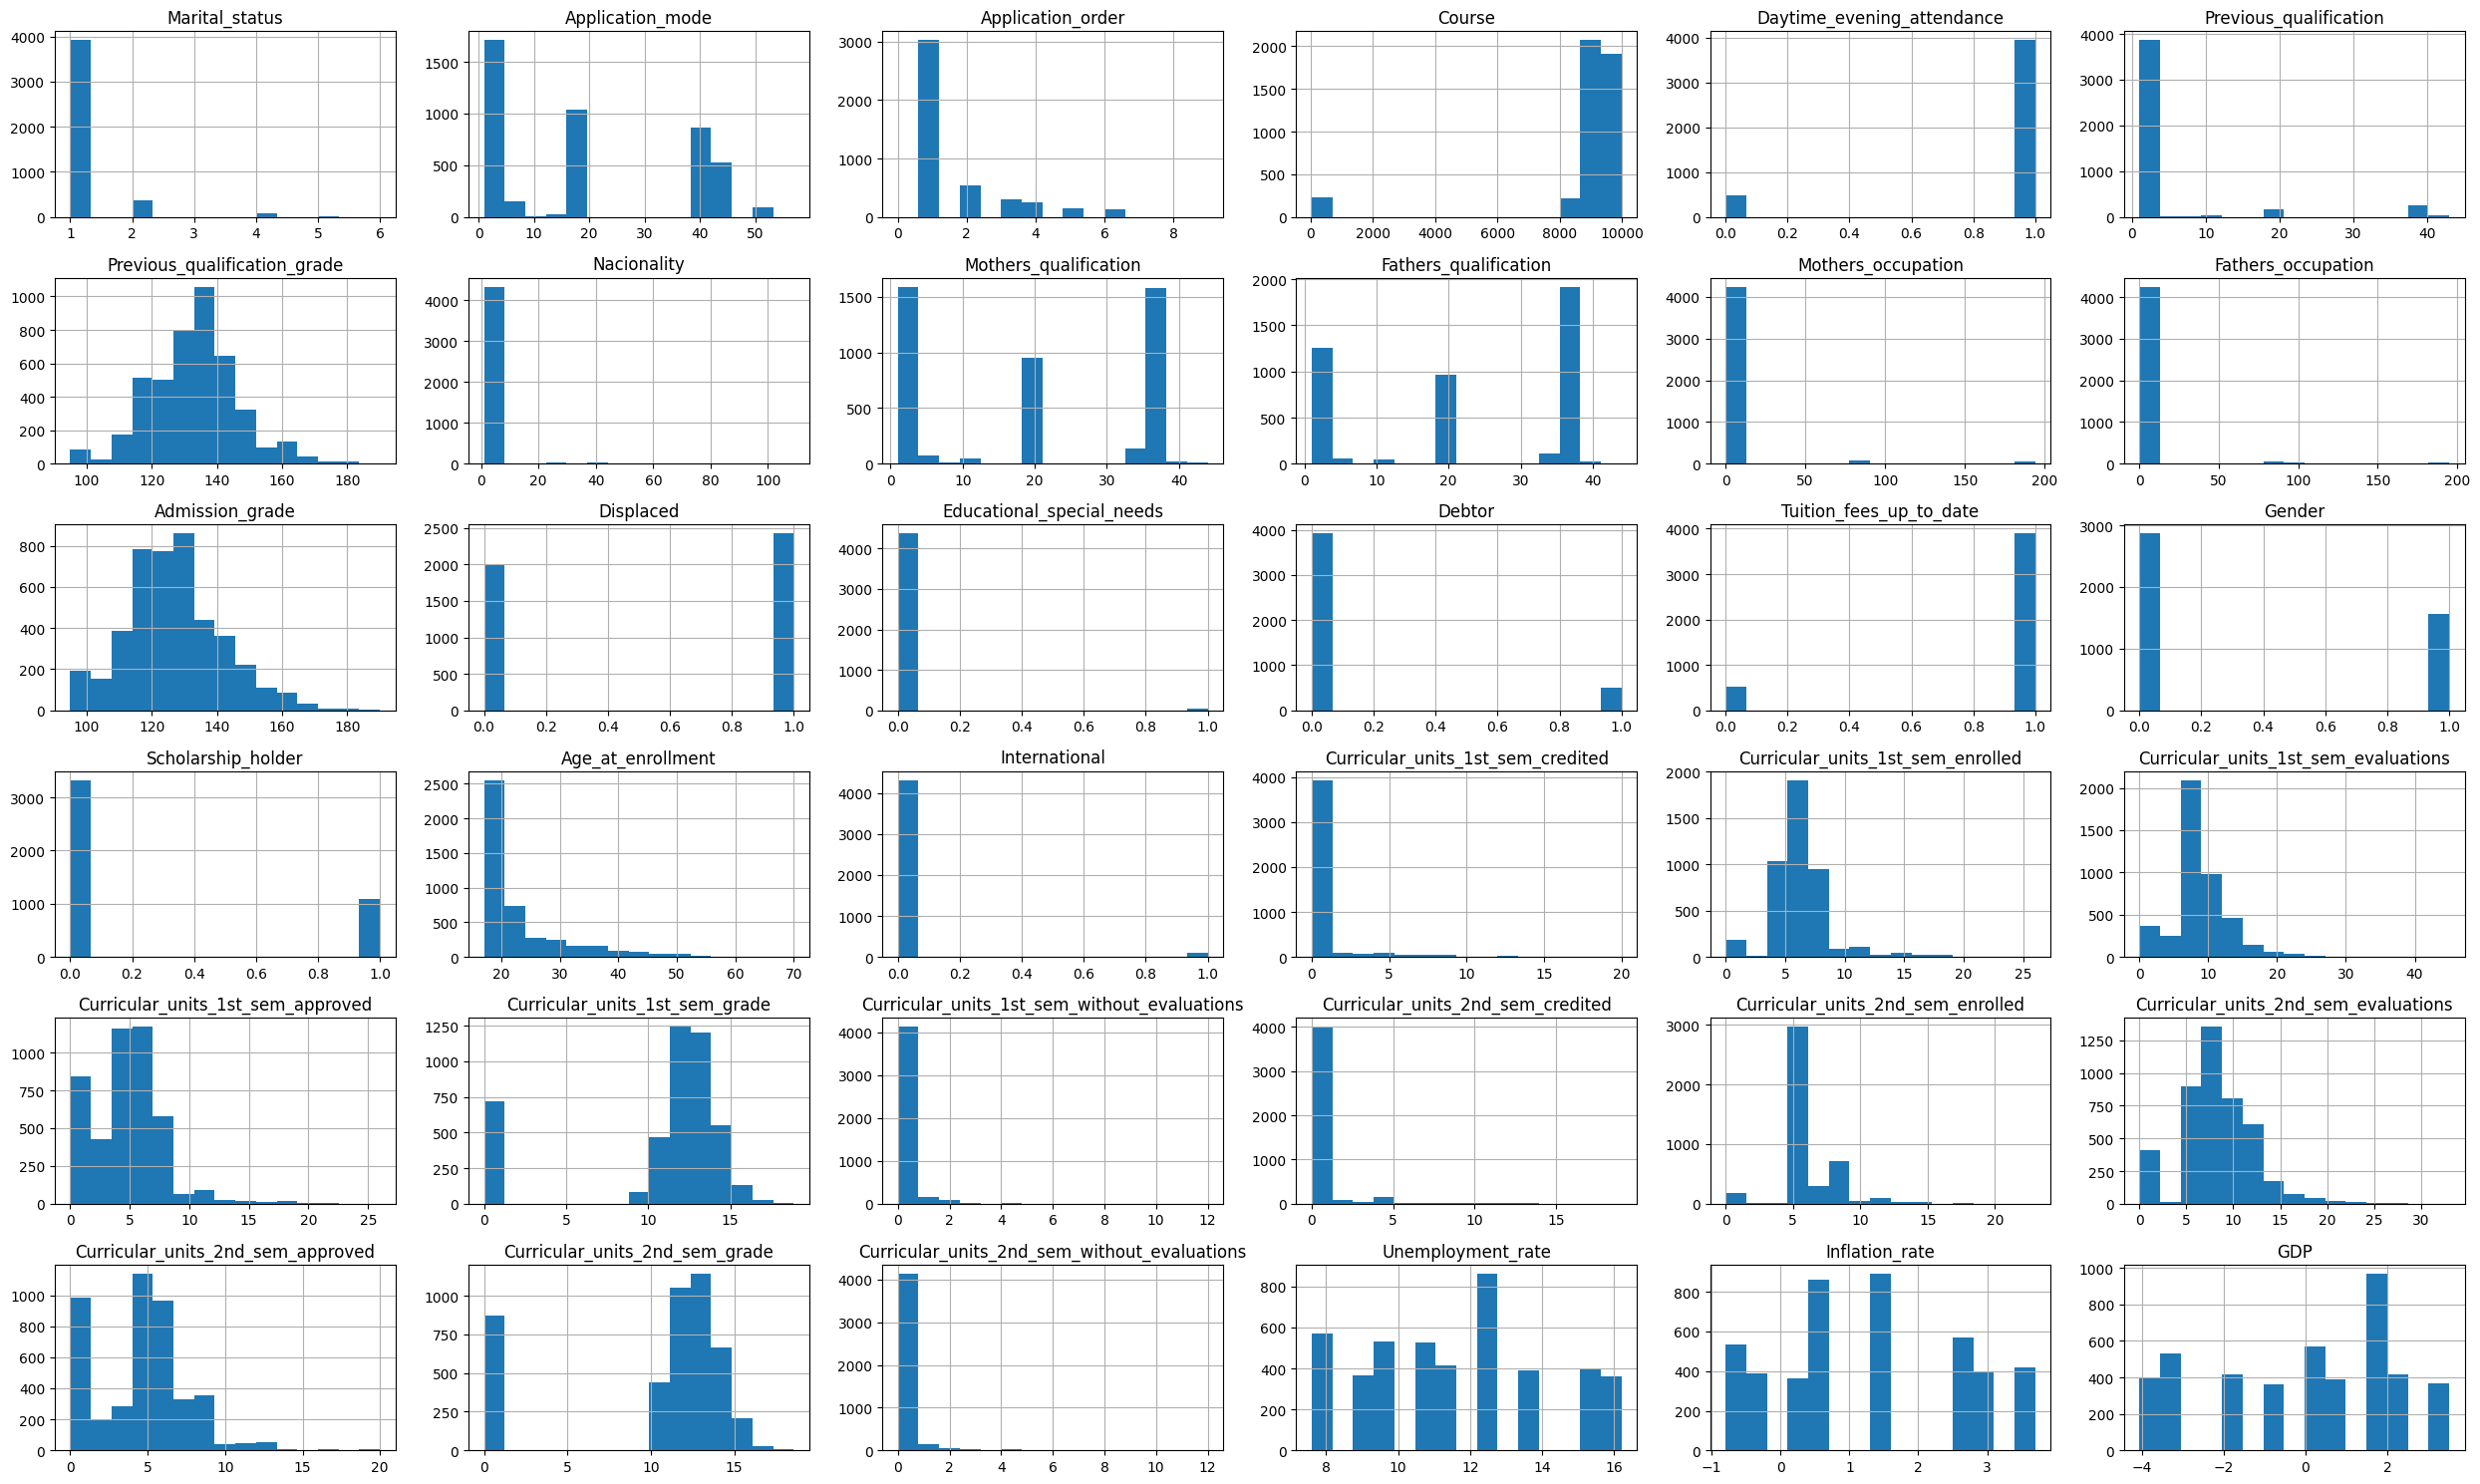

In [198]:
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

data[numeric_columns].hist(bins=15, figsize=(25, 15))
plt.tight_layout()
plt.show()

Visualisasi ini menampilkan jumlah mahasiswa berdasarkan statusnya. Dari hasil visualisasi, diketahui bahwa jumlah mahasiswa yang mengalami dropout tergolong cukup besar.

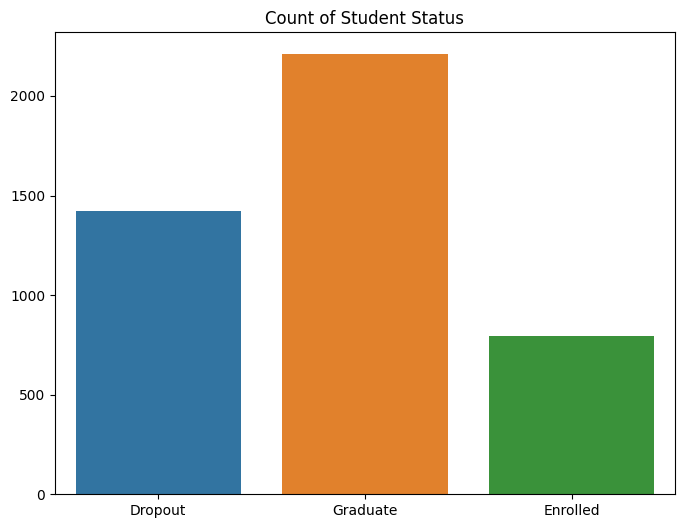

In [199]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Status", hue="Status")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Count of Student Status")
plt.show()

Grafik menunjukkan distribusi status mahasiswa berdasarkan kepemilikan beasiswa. Mahasiswa yang tidak menerima beasiswa memiliki tingkat dropout yang jauh lebih tinggi dibandingkan dengan yang menerima beasiswa.

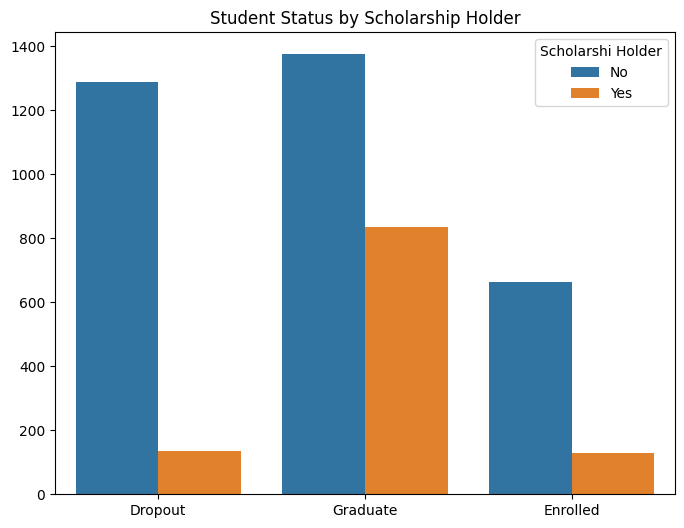

In [200]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Status", hue="Scholarship_holder")
plt.xlabel(None)
plt.ylabel(None)
plt.title("Student Status by Scholarship Holder")
plt.legend(title="Scholarshi Holder", loc="best", labels=["No", "Yes"])
plt.show()

Grafik ini menunjukkan jumlah mahasiswa yang dropout berdasarkan masing-masing kode course. Jumlah dropout tertinggi terjadi pada course 9991 dan 9147, sedangkan course 33 memiliki dropout paling sedikit.

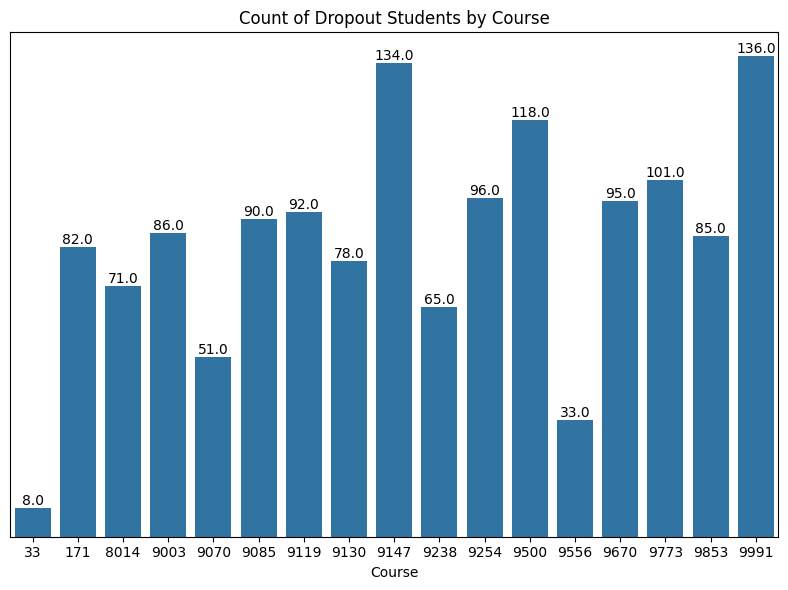

In [201]:
dropout_data = data[data["Status"] == "Dropout"]

plt.figure(figsize=(8, 6))
ax = sns.countplot( data=dropout_data, x="Course")
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{height}', 
        ha='center', 
        va='bottom'
    )

plt.title("Count of Dropout Students by Course")
plt.yticks([])
plt.ylabel(None)
plt.tight_layout()
plt.show()


Sebagian besar mahasiswa pada course 9147, 9500, dan 9991 bukan penerima beasiswa. Hal ini mengindikasikan bahwa rendahnya jumlah penerima beasiswa mungkin berkorelasi dengan tingginya angka dropout, terutama pada course 9991.

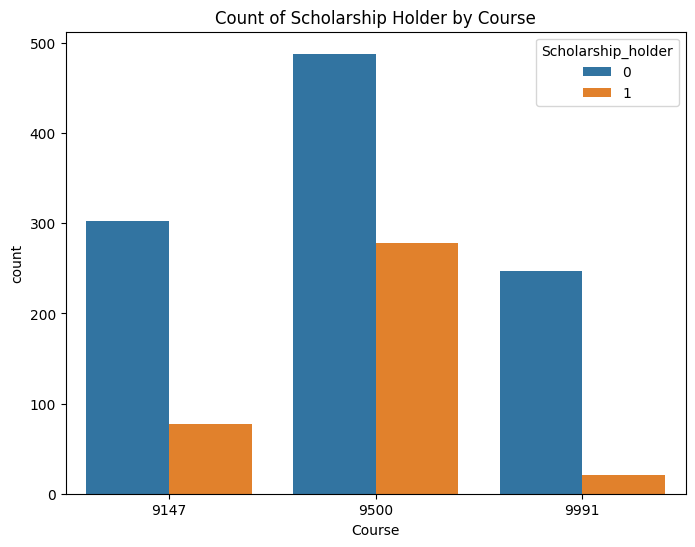

In [202]:
course_selected = data[data["Course"].isin([9991, 9147, 9500])]

plt.figure(figsize=(8, 6))
sns.countplot(data=course_selected, x="Course", hue="Scholarship_holder")
plt.title("Count of Scholarship Holder by Course")
plt.show()

Dropout terbanyak pada course 9147, 9500, dan 9991 terjadi pada mahasiswa yang tidak menerima beasiswa. Mahasiswa penerima beasiswa jarang mengalami dropout, yang menunjukkan bahwa beasiswa berpotensi mendorong keberhasilan studi.

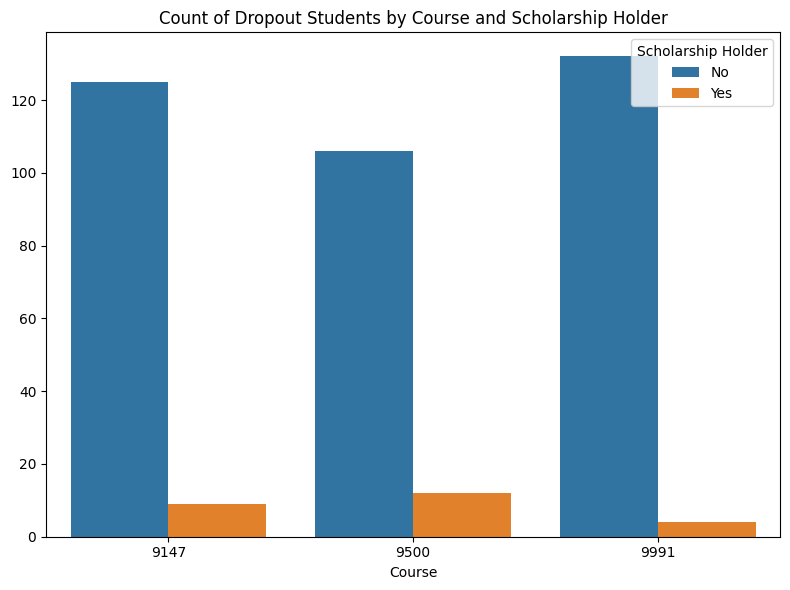

In [203]:
course_selected_dropout = dropout_data[dropout_data["Course"].isin([9991, 9147, 9500])]
plt.figure(figsize=(8, 6))
sns.countplot(data=course_selected_dropout, x="Course", hue="Scholarship_holder")
plt.title("Count of Dropout Students by Course and Scholarship Holder")
plt.legend(loc="upper right", title="Scholarship Holder", labels=["No", "Yes"])
plt.ylabel(None)
plt.tight_layout()
plt.show()

Heatmap ini menunjukkan korelasi antara status Displaced, Debtor (memiliki hutang), dan Dropout. Terlihat bahwa terdapat korelasi positif sebesar 0.23 antara status Debtor dan Dropout, yang menunjukkan bahwa mahasiswa yang memiliki hutang cenderung memiliki kemungkinan lebih tinggi untuk mengalami dropout. Sementara itu, variabel Displaced menunjukkan korelasi negatif lemah dengan Dropout (-0.11) dan Debtor (-0.09), yang berarti tidak terdapat hubungan yang kuat antara status Displaced dengan dropout maupun hutang.

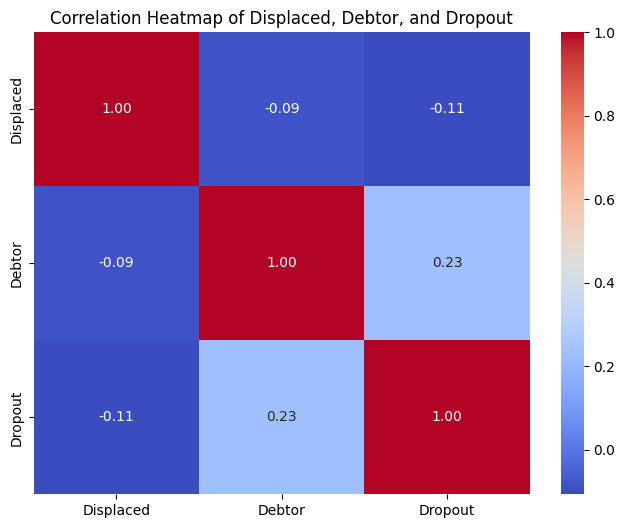

In [204]:
displaced_debtor = data[["Displaced", "Debtor"]].copy()
displaced_debtor["Dropout"] = data["Status"].apply(lambda x: 1 if x == "Dropout" else 0)

corr = displaced_debtor.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Displaced, Debtor, and Dropout")
plt.show()

Heatmap ini menampilkan korelasi antar fitur dalam dataset. Terlihat bahwa fitur-fitur akademik seperti jumlah mata kuliah yang disetujui dan nilai evaluasi memiliki korelasi positif yang kuat satu sama lain.

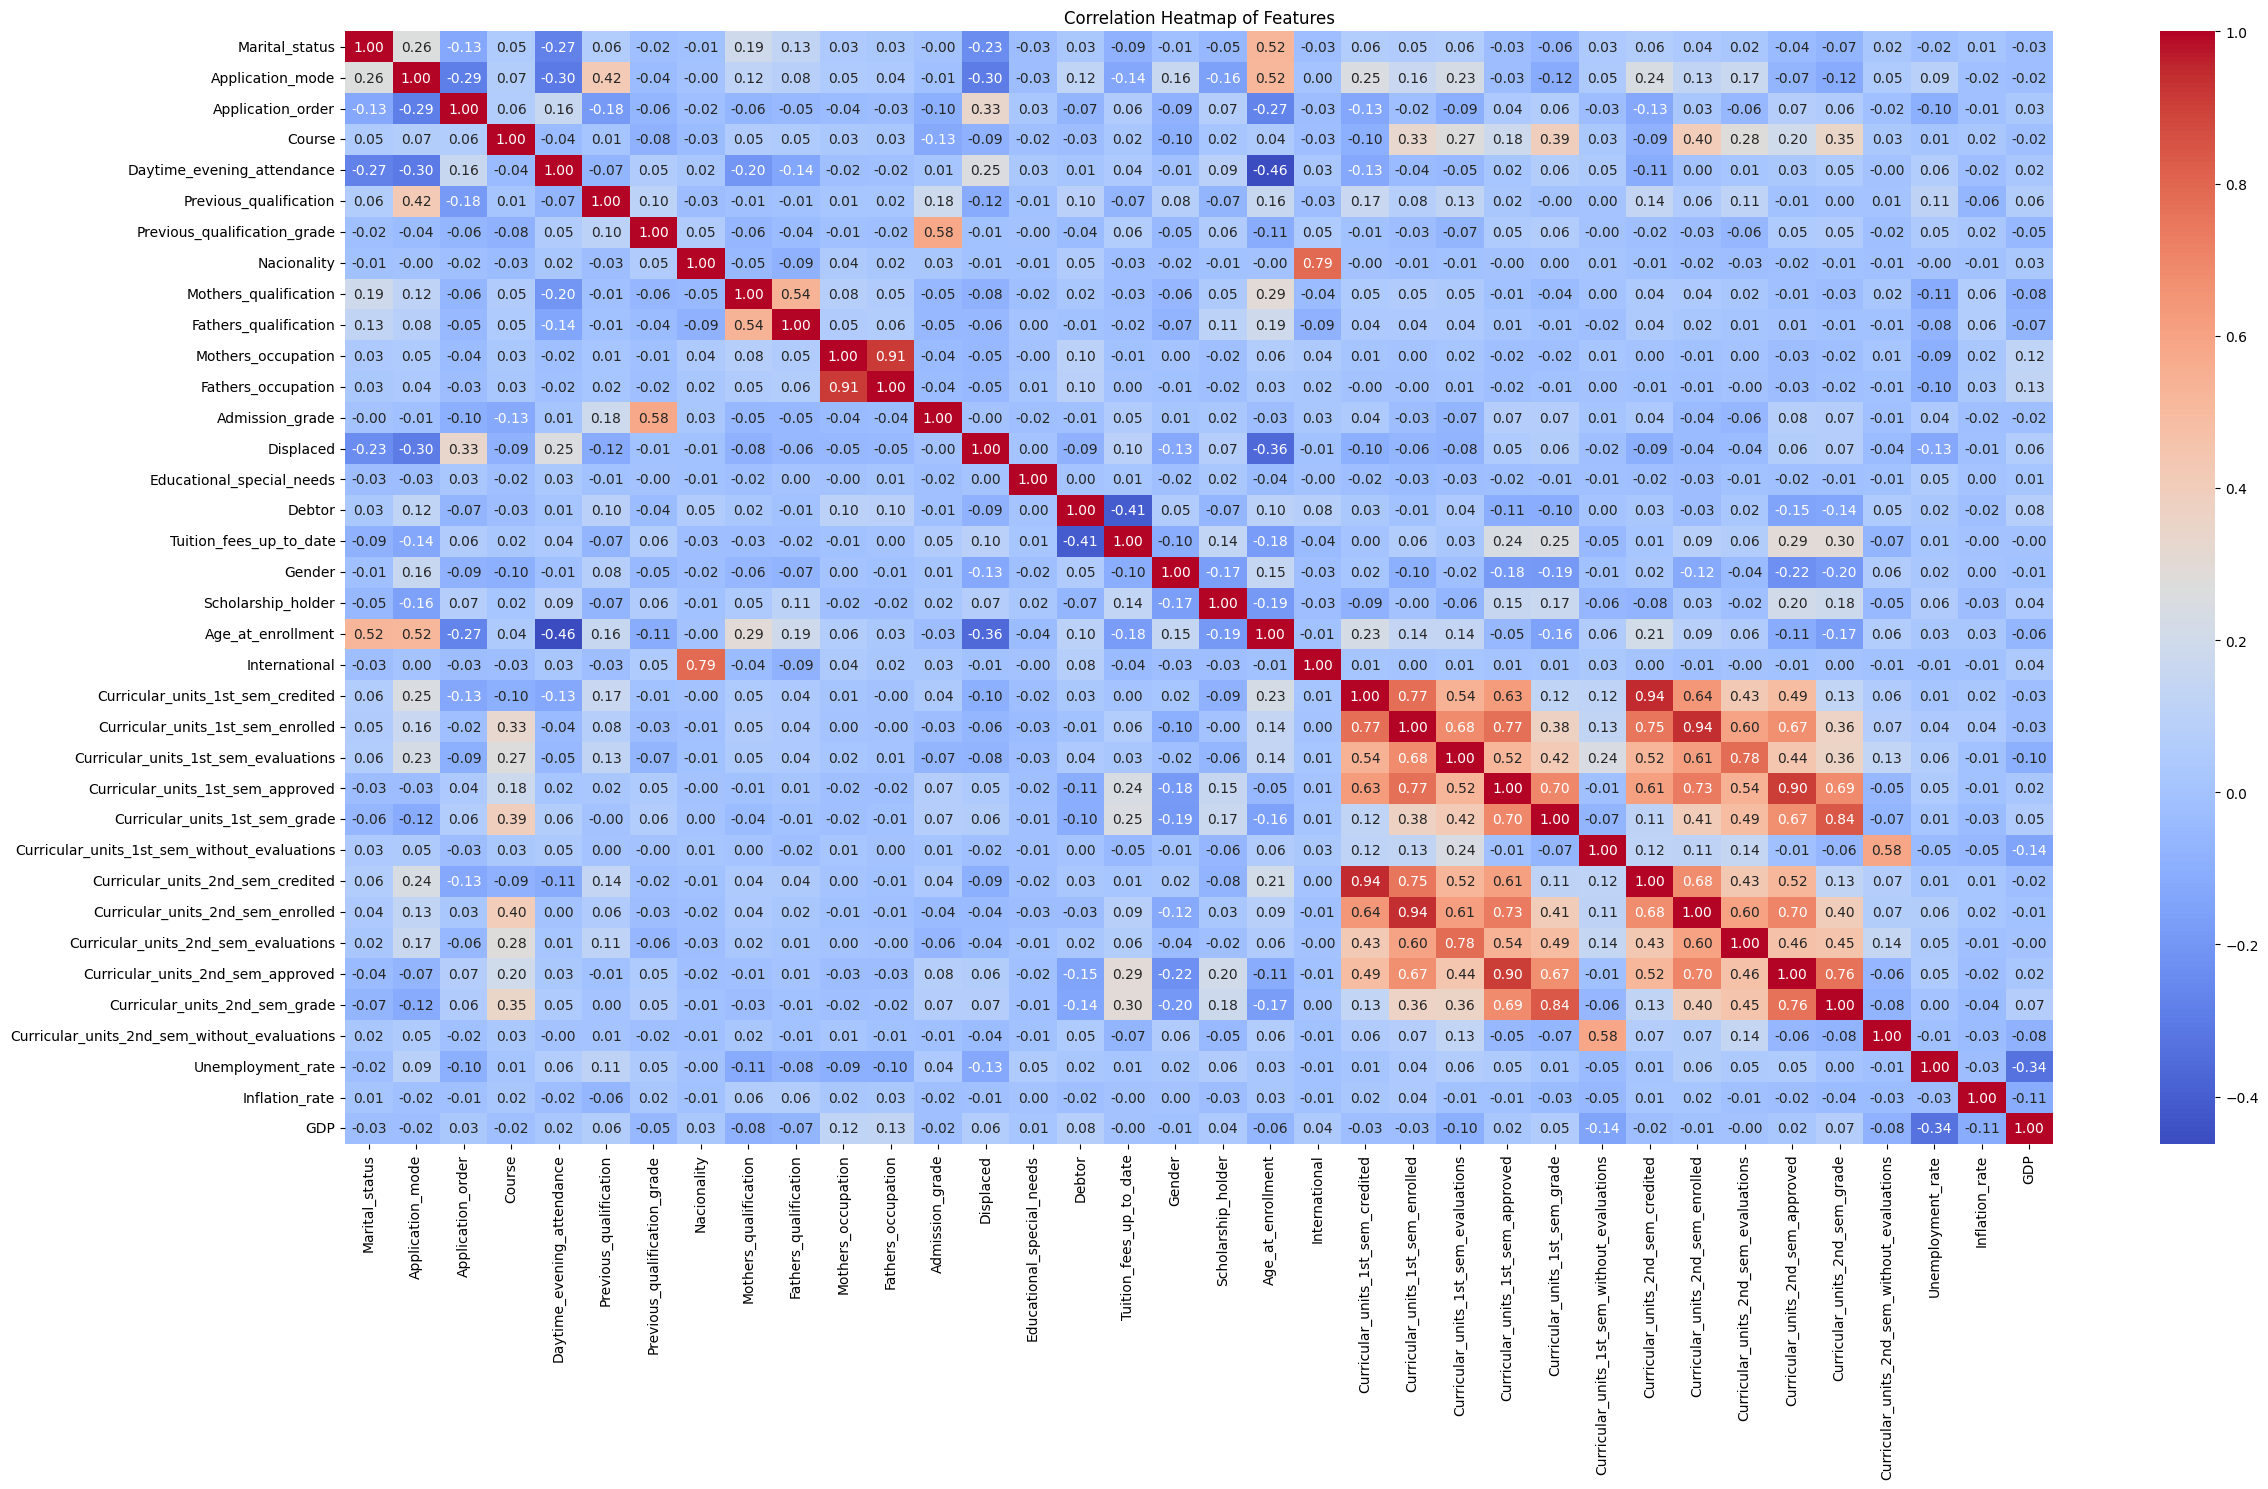

In [205]:
features_correlation = data[numeric_columns].corr()
plt.figure(figsize=(25, 15))
sns.heatmap(features_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

Melakukan drop terhadap fitur-fitur yang tidak relevan atau tidak berkontribusi signifikan terhadap performa model machine learning.

In [206]:
drop_features = [
    "Marital_status", "Gender", "Nacionality", "International",
    "Daytime_evening_attendance", "Mothers_qualification",
    "Fathers_qualification", "Mothers_occupation", "Fathers_occupation",
    "Application_mode", "Application_order", "Unemployment_rate",
    "Inflation_rate", "GDP", "Curricular_units_1st_sem_credited",
    "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_2nd_sem_without_evaluations"
]

df = data.drop(columns=drop_features)

print("Dataframe shape: ", df.shape)
df.head()

Dataframe shape:  (4424, 19)


,Course,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,171,1,122.0,127.3,1,0,0,1,0,20,0,0,0,0.000000,0,0,0,0.000000,Dropout
1,9254,1,160.0,142.5,1,0,0,0,0,19,6,6,6,14.000000,6,6,6,13.666667,Graduate
2,9070,1,122.0,124.8,1,0,0,0,0,19,6,0,0,0.000000,6,0,0,0.000000,Dropout
3,9773,1,122.0,119.6,1,0,0,1,0,20,6,8,6,13.428571,6,10,5,12.400000,Graduate
4,8014,1,100.0,141.5,0,0,0,1,0,45,6,9,5,12.333333,6,6,6,13.000000,Graduate


## Data Preparation / Preprocessing

Membagi data menjadi dua bagian, yaitu input (fitur) dan target (label).

In [207]:
X = df.drop("Status", axis=1)
y = df["Status"].apply(lambda x: 1 if x == "Dropout" else 0)

print("Features shape: ", X.shape)
print("Target shape: ", y.shape)

Features shape:  (4424, 18)
Target shape:  (4424,)


Membagi dataset menjadi data latih dan uji.

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print("Training set shape: ", X_train.shape, y_train.shape)
print("Test set shape: ", X_test.shape, y_test.shape)

Training set shape:  (3981, 18) (3981,)
Test set shape:  (443, 18) (443,)


Menangani target tidak seimbang dengan Over Sampling pada data latih.

In [209]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE: ", y_train_resampled.value_counts())

Class distribution after SMOTE:  Status
0    2702
1    2702
Name: count, dtype: int64


Membagi data latih yang telah melalui proses oversampling menjadi dua bagian, yaitu data latih dan data validasi.

In [210]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

print("Training set shape: ", X_train.shape, y_train.shape)
print("Validation set shape: ", X_val.shape, y_val.shape)

Training set shape:  (4323, 18) (4323,)
Validation set shape:  (1081, 18) (1081,)


Penskalaan fitur menggunakan MinMaxScaler untuk mengubah nilai fitur ke dalam rentang 0 hingga 1, sehingga setiap fitur memiliki kontribusi yang seimbang dalam proses pelatihan model.

In [211]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,Course,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
0,0.915244,0.000000,0.361702,0.500000,0.0,0.0,0.0,1.0,0.0,0.488889,0.192308,0.222222,0.153846,0.596026,0.217391,0.285714,0.20,0.619231
1,0.925989,0.000000,0.234043,0.220000,1.0,0.0,0.0,1.0,1.0,0.022222,0.230769,0.194444,0.230769,0.643330,0.260870,0.285714,0.30,0.610256
2,0.909018,0.904762,0.680851,0.684211,1.0,0.0,0.0,1.0,0.0,0.066667,0.230769,0.194444,0.230769,0.750552,0.260870,0.607143,0.25,0.741880
3,0.925989,0.000000,0.343440,0.274579,0.0,0.0,0.0,0.0,0.0,0.066667,0.230769,0.250000,0.115385,0.560118,0.260870,0.321429,0.00,0.000000
4,0.950693,0.000000,0.394681,0.212632,0.0,0.0,0.0,1.0,0.0,0.688889,0.269231,0.305556,0.153846,0.622517,0.304348,0.500000,0.15,0.631346


Dataset baru dibentuk dari fitur yang telah diskalakan, dan disiapkan untuk proses PCA guna mengurangi jumlah dimensi tanpa menghilangkan informasi utama yang dibutuhkan untuk pemodelan.

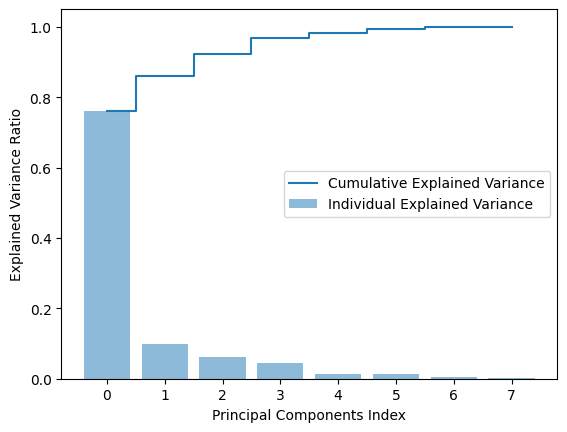

In [212]:
X_train_pca_df = X_train.copy().reset_index(drop=True)
X_val_pca_df = X_val.copy().reset_index(drop=True)
X_test_pca_df = X_test.copy().reset_index(drop=True)

pca_features = [
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
]

pca = PCA(n_components=len(pca_features), random_state=42)
pca.fit(X_train_pca_df[pca_features])
princ_components = pca.transform(X_train_pca_df[pca_features])

var_explained = pca.explained_variance_ratio_.round(3)
cum_var_explained = np.cumsum(var_explained)

plt.bar(range(len(pca_features)), var_explained, alpha=0.5, align="center", label="Individual Explained Variance")
plt.step(range(len(pca_features)), cum_var_explained, where="mid", label="Cumulative Explained Variance")
plt.xlabel("Principal Components Index")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

Menerapkan PCA dengan tiga komponen utama untuk mengurangi dimensi data sebelum dilakukan pelatihan model, sehingga proses komputasi menjadi lebih efisien.

In [213]:
pca = PCA(n_components=3, random_state=42)
pca.fit(X_train_pca_df[pca_features])

X_train_pca = pca.transform(X_train_pca_df[pca_features])
X_val_pca = pca.transform(X_val_pca_df[pca_features])
X_test_pca = pca.transform(X_test_pca_df[pca_features])

X_train_pca_df[["PC1", "PC2", "PC3"]] = X_train_pca
X_train_pca_df = X_train_pca_df.drop(columns=pca_features)

X_val_pca_df[["PC1", "PC2", "PC3"]] = X_val_pca
X_val_pca_df = X_val_pca_df.drop(columns=pca_features)

X_test_pca_df[["PC1", "PC2", "PC3"]] = X_test_pca
X_test_pca_df = X_test_pca_df.drop(columns=pca_features)

print("Training set shape after PCA: ", X_train_pca_df.shape)
print("Validation set shape after PCA: ", X_val_pca_df.shape)
print("Test set shape after PCA: ", X_test_pca_df.shape)

Training set shape after PCA:  (4323, 13)
Validation set shape after PCA:  (1081, 13)
Test set shape after PCA:  (443, 13)


## Modeling

Melatih model menggunakan empat algoritma klasifikasi, yaitu Logistic Regression, Random Forest, Support Vector Machine (SVM), dan Decision Tree. Tujuan dari langkah ini adalah untuk membandingkan performa masing-masing algoritma dan menentukan model yang paling sesuai berdasarkan hasil evaluasi.

In [214]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

accuracy = {}
val_accuracy = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    
    accuracy[name] = train_score
    val_accuracy[name] = val_score
    
result = pd.DataFrame({
    "Training Accuracy": accuracy,
    "Validation Accuracy": val_accuracy
})
result = result.sort_values(by="Validation Accuracy", ascending=False)
result

,Training Accuracy,Validation Accuracy
Random Forest,1.000000,0.877891
Logistic Regression,0.860282,0.847364
SVM,0.864446,0.844588
Decision Tree,1.000000,0.830712


Melakukan pelatihan model dengan empat algoritma klasifikasi yang berbeda, yaitu Logistic Regression, Random Forest, Support Vector Machine (SVM), dan Decision Tree, menggunakan dataset yang telah direduksi dimensinya dengan PCA. Langkah ini bertujuan untuk mengevaluasi kinerja masing-masing algoritma pada data berdimensi rendah dan menentukan model yang paling optimal

In [215]:
models_pca = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models_pca.items():
    model.fit(X_train_pca, y_train)
    train_score = model.score(X_train_pca, y_train)
    val_score = model.score(X_val_pca, y_val)

    accuracy[name] = train_score
    val_accuracy[name] = val_score

result_pca = pd.DataFrame({
    "Training Accuracy PCA": accuracy,
    "Validation Accuracy PCA": val_accuracy
})
result_pca = result_pca.sort_values(by="Validation Accuracy PCA", ascending=False)
result_pca

,Training Accuracy PCA,Validation Accuracy PCA
SVM,0.808004,0.788159
Random Forest,0.977562,0.782609
Logistic Regression,0.785334,0.773358
Decision Tree,0.977562,0.736355


## Evaluation

Menguji model Logistic Regression dengan data uji.

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       301
           1       0.81      0.80      0.81       142

    accuracy                           0.88       443
   macro avg       0.86      0.86      0.86       443
weighted avg       0.88      0.88      0.88       443



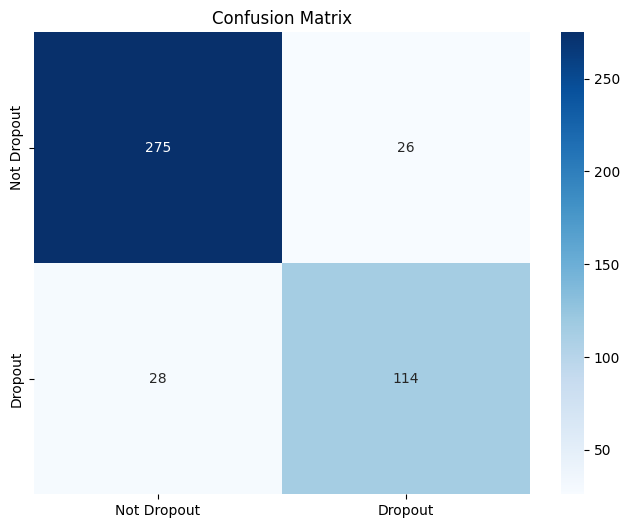

In [216]:
y_pred = models["Logistic Regression"].predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Dropout", "Dropout"], 
            yticklabels=["Not Dropout", "Dropout"])
plt.title("Confusion Matrix")
plt.show()

Menyimpan model yang telah dilatih beserta objek scaler dan daftar fitur dalam satu berkas .joblib.

In [ ]:
package = {
    "model": models["Logistic Regression"],
    "scaler": scaler,
    "features": list(X.columns)
}

with open("model_package.joblib", "wb") as f:
    joblib.dump(package, f)

print("Successfully saved model package.")

Succesed Save Model Package
